In [0]:
# Użycie zapisanych na dysku zdjęć.
!unzip -q '/content/drive/My Drive/train_val_test.zip' -d '/content'

In [2]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)

import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report

batch_size = 128 # było 64
epochs = 10
IMG_HEIGHT, IMG_WIDTH, channels = 220, 220, 3

dir = '/content/'
dir_path = os.path.join(dir, 'train_val_test')

train_gen = ImageDataGenerator(rescale=1.0/255.) # rescale=1.0/255., dtype='uint8'
val_gen = ImageDataGenerator(rescale=1.0/255.)
test_gen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_gen.flow_from_directory(
    dir_path + '/train',
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)
validation_generator = val_gen.flow_from_directory(
    dir_path + '/val',
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)
test_generator = test_gen.flow_from_directory(
    dir_path + '/test',
    batch_size=1,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    seed=2)

Using TensorFlow backend.


Found 87517 images belonging to 5 classes.
Found 10938 images belonging to 5 classes.
Found 10943 images belonging to 5 classes.


In [0]:
# Użycie zapisanego na dysku modelu.
model = tf.keras.models.load_model('/content/drive/My Drive/model.h5')

In [0]:
# Tworzenie modelu. Jeśli model jest wczytywany to nie tworzyć bo to go usunie.
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation="relu", 
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), 
                 data_format="channels_last"))
model.add(Conv2D(32, kernel_size=5, activation="relu"))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(Dropout(0.3)) # użycie gdy jest przeuczony, dużo więcej acc niż val_acc
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
# warstwa łącząca conv2d z warstwą dense
model.add(Flatten())
# liczba taka ile wyjść, czyli 5 bo tyle jest typów
model.add(Dense(5, activation="softmax"))

# compile model using accuracy to measure model performance
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
              loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 214, 214, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 212, 212, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 106, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 102, 102, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 16)      4

In [4]:
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
history = model.fit(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs, shuffle=True,
                    use_multiprocessing=False, verbose=1) # verbose=2 <- bez wskaznika postępu, use_multiprocessing=False <- bardzo spowalnia ale nie ma błęw ani ostrzeżeń

Epoch 1/10
683/683 [==============================] - 269s 395ms/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.1125 - val_accuracy: 0.9689
Epoch 2/10
683/683 [==============================] - 261s 382ms/step - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.1171 - val_accuracy: 0.9677
Epoch 3/10
683/683 [==============================] - 255s 373ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.1160 - val_accuracy: 0.9672
Epoch 4/10
683/683 [==============================] - 249s 365ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.1219 - val_accuracy: 0.9713
Epoch 5/10
683/683 [==============================] - 250s 366ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.1232 - val_accuracy: 0.9675
Epoch 6/10
683/683 [==============================] - 249s 364ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.1237 - val_accuracy: 0.9692
Epoch 7/10
683/683 [==============================] - 248s 363ms/step - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.1236 -

10943/10943 [==============================] - 44s 4ms/step - loss: 0.1051 - accuracy: 0.9725
loss =  0.10505760461091995
accuracy =  0.9724938273429871
10943/10943 [==============================] - 36s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        59
           1       0.99      0.98      0.99      9150
           2       0.98      0.99      0.98       797
           3       0.58      0.84      0.69       210
           4       0.92      0.92      0.92       727

    accuracy                           0.97     10943
   macro avg       0.83      0.93      0.87     10943
weighted avg       0.98      0.97      0.97     10943



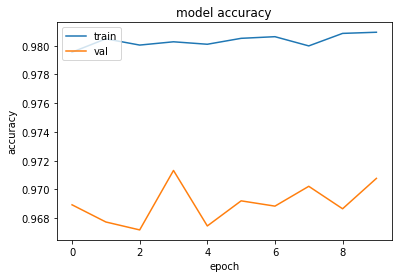

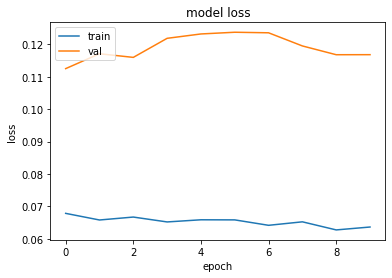

In [5]:
# Sprawdzenie poprawności na danych testowych
test_generator.reset()
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size 
scores = model.evaluate(test_generator, 
                        steps=STEP_SIZE_TEST,
                        verbose=1)
print(model.metrics_names[0] + " = ", scores[0])
print(model.metrics_names[1] + " = ", scores[1])

test_generator.reset()
probabilities = model.predict(test_generator, 
                              steps=STEP_SIZE_TEST,
                              verbose=1)
y_test = probabilities.argmax(axis=1)
y_pred = test_generator.classes
print(classification_report(y_test, y_pred))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# Zapisanie modelu
model.save('/content/drive/My Drive/model.h5')

In [7]:
# Zapisanie pliku .csv porównując typ i predykcję, jest podane zdjęcie więc łatwo będzie sprawdzić co z nim nie tak
test_generator.reset()
probabilities = model.predict(test_generator, 
                              steps=STEP_SIZE_TEST,
                              verbose=1)
predicted_class_indices = np.argmax(probabilities, axis=1)
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
results=pd.DataFrame({"Filename": filenames,
                      "Predictions": predictions,})
results.to_csv("results.csv", sep=';', index=False)

10943/10943 [==============================] - 38s 3ms/step
